In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# **Информация о датасете**

Датасет содержит информацию об ожидаемой продолжительности жизни и факторах здоровья населения 193-х стран за 2000-2015 годы. Набор данных содержит около 22 признаков, которые можно разделить на категории: факторы, связанные с иммунизацией, факторы смертности, экономические факторы и социальные факторы.


## **Загрузка и чтение данных**



In [2]:
url = "https://raw.githubusercontent.com/lutovatanya/machine-learning-course/025d68b79d4fba538d9a04861f199ed40c13a180/Life_Expectancy_Data.csv"
data_raw = pd.read_csv(url, sep=',', engine='python')
data_raw.shape

(2938, 22)

Как видно из вывода, набор данных содержит 2939 строк и 22 столбца

In [3]:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Всего в датасете содержится 22 признака  
  
**Признаки:** 
  
0. Country - страна  
1. Year - год  
2. Status - статус  
3. Life expectancy	- ожидаемая продолжительность жизни  
4. Adult Mortality - показатели смертности среди взрослых (от 15 до 60 лет)  
5. infant deaths - кол-во младенческих смертей  
6. Alcohol - учет потребления алкоголя на душу населения  
7. percentage expenditure - расходы на здравоохранение в % от ВВП на душу населения  
8. Hepatitis B - охват иммунизацией против гепатита B среди годовалых детей %  
9. Measles - корь - кол-во случаев  
10. BMI - средний индекс массы тела всего населения  
11. under-five deaths - кол-во смертей детей в возрасте до 5 лет  
12. Polio - охват иммунизацией от полиомиелита среди годовалых детей (%)  
13. Total expenditure - общие гос. расходы на здравоохранение как процент от общих государственных  
14. Diphtheria - охват иммунизацией от столбняка, дифтерии и коклюша среди детей в возрасте 1 года (%)  
15. HIV/AIDS - смертность ВИЧ / СПИД (0-4 года)   
16. GDP - ВВП на душу населения  
17. Population - население страны  
18. thinness 10-19 years -распространенность худобы среди детей от 10 до 19 лет (%)  
19. thinness 5-9 years -  распространенность худобы среди детей от 5 до 9 лет (%)  
20. Income composition of resources - индекс человеческого развития с точки зрения доходной структуры ресурсов (от 0 до 1)  
21. Schooling - кол-во лет обучения   

Рассмотрим отдельно признаки. Здесь можно узнать типы значений в столбцах

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Выведем колоки отдельно

In [5]:
data_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Названия совпадают, но есть лишние отступы, которые стоит убрать для более аккуратного оформления

In [6]:
data_raw.rename(columns={'Life expectancy ': 'Life expectancy', 'Measles ': 'Measles' , ' BMI ': 'BMI', 'under-five deaths ': 'Under-five deaths', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS', ' thinness  1-19 years': 'Thinness 1-19 years', ' thinness 5-9 years': 'Thinness 5-9 years' }, inplace=True)
data_raw.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

# **Обработка категориальных признаков**

Признаки "Country" и "Status" являются категориальными и принимает 193 и 2 значения соответсвенно. Обработаем их, преобразовав тип к необходимому для обработки категориальных значений

In [8]:
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Status'] = data_raw['Status'].astype('category')

In [9]:
data_raw['Status'].dtype

CategoricalDtype(categories=['Developed', 'Developing'], ordered=False)

In [10]:
data_raw['Country'].dtype

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Angola',
                  'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria', 'Azerbaijan',
                  ...
                  'United Republic of Tanzania', 'United States of America',
                  'Uruguay', 'Uzbekistan', 'Vanuatu',
                  'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
                  'Zambia', 'Zimbabwe'],
                 ordered=False)

# **Визуализация и получение основных характеристик**

In [11]:
data_raw.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


В описании можно увидеть:  

* count - количество значений для каждого признака. В нашем случае, в таблице все значения различны из-за пропущенных.
* mean - среднее значение
* std - стандартное отклонение 
* min/max - минимальное / максимальное значение  
* 25% - первый квартиль
* 50% - медиана  
* 75% - третий квартиль  







In [12]:
data_raw.describe(include=['category'])

,Country,Status
count,2938,2938
unique,193,2
top,Zimbabwe,Developing
freq,16,2426


Для категориальных признаков мы получили:  
  
*  count - количество значений.  
*  unique - количество уникальных значений.  
*  top - наиболее встречающееся значение.
*  freq - частота наиболее встречающегося значения. 

### **Вычислим матрицу корреляции**

In [13]:
corr_matrix = data_raw.corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


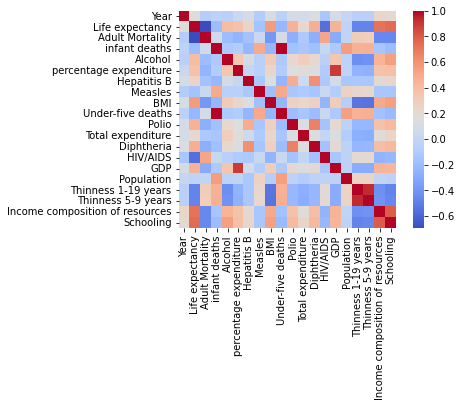

In [14]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Можно заметить, что признаки thinness 1-19 years и thinness 5-9 years имеют коэффициент корреляции близкий к 1, что логично, так как это аналогичные признаки, кроме того, коэффициенты корреляции близкие к 1 имеют признаки Schooling и Income composition of resources

### **Рассмотрим категориальные признаки** 

In [15]:
data_raw['Country'].value_counts()

Zimbabwe         16
Gabon            16
Guinea-Bissau    16
Guinea           16
Guatemala        16
                 ..
Cook Islands      1
Tuvalu            1
Nauru             1
Palau             1
Dominica          1
Name: Country, Length: 193, dtype: int64

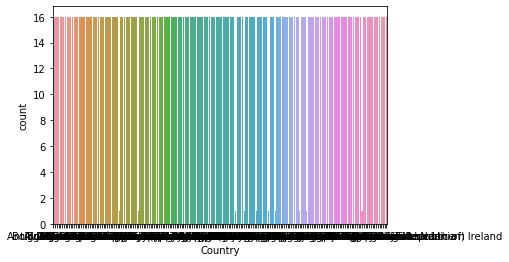

In [16]:
sns.countplot(x='Country', data=data_raw)
pass

Количество всех стран одинаково и равно 16, то есть информация о каждой стране есть за каждый год с 2000 до 2015


In [17]:
data_raw['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

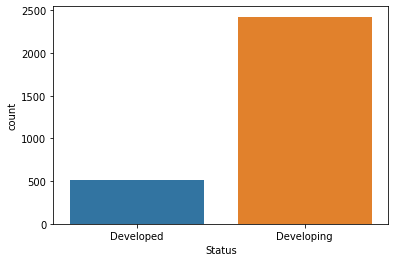

In [18]:
sns.countplot(x='Status', data=data_raw)
pass

Можно увидеть, что количество развивающихся стран значительно выше



# **Обработка пропущенных значений**

Посмотрим, в каких строках у нас пропущены значения

In [19]:
data_raw.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Заполним пропущенные значения медианой

In [20]:
data_raw["Population"].fillna(data_raw["Population"].median(axis = 0), axis=0 , inplace=True)
data_raw["Hepatitis B"].fillna(data_raw["Hepatitis B"].median(axis = 0), axis=0 , inplace=True)
data_raw["GDP"].fillna(data_raw["GDP"].median(axis = 0), axis=0 , inplace=True)
data_raw["Total expenditure"].fillna(data_raw["Total expenditure"].median(axis = 0), axis=0 , inplace=True)
data_raw["Alcohol"].fillna(data_raw["Alcohol"].median(axis = 0), axis=0 , inplace=True)
data_raw["Income composition of resources"].fillna(data_raw["Income composition of resources"].median(axis = 0), axis=0 , inplace=True)
data_raw["Schooling"].fillna(data_raw["Schooling"].median(axis = 0), axis=0 , inplace=True)

In [21]:
data_raw.isna().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                34
Under-five deaths                   0
Polio                              19
Total expenditure                   0
Diphtheria                         19
HIV/AIDS                            0
GDP                                 0
Population                          0
Thinness 1-19 years                34
Thinness 5-9 years                 34
Income composition of resources     0
Schooling                           0
dtype: int64

Остальные признаки имеют слишком малое кол-во пропущенных значений, поэтому можем просто удалить строчки с недостающими значениями

In [22]:
data_raw.dropna(axis=0, how='all', subset=['Life expectancy'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Adult Mortality'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['BMI'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Polio'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Diphtheria'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 1-19 years'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 5-9 years'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(2888, 22)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Обработка категориальных значений**

Так как наши категориальные признаки в буквынной форме, закодируем их с помощью числовых признаков

In [23]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(2888, 215)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),...,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **Нормализация**

Проведем нормализацию с помощью линейного преобразования к отрезку [0,1]

In [24]:
data_norm = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_norm.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),...,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,0.0,2888.000000,2888.000000,0.0,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,0.0,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.501016,0.627123,0.224872,0.016842,0.256437,0.038474,0.836915,0.011511,0.485915,0.016794,0.829918,0.322035,0.829254,0.032669,0.056222,0.007947,0.172123,0.167766,0.669837,0.585821,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,...,0.005540,0.005540,0.005540,0.005540,NaN,0.005540,0.005540,NaN,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.004848,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,NaN,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.177285,0.822715
std,0.307129,0.180179,0.171771,0.066051,0.220295,0.102828,0.234541,0.054488,0.260609,0.064697,0.243059,0.138725,0.243803,0.101318,0.112384,0.042095,0.160196,0.158260,0.211680,0.150127,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,...,0.074239,0.074239,0.074239,0.074239,NaN,0.074239,0.074239,NaN,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.069468,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,NaN,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.381976,0.381976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Так как у нас есть значения NaN, заполним их медианой

In [25]:
data_norm["Country_South Sudan"].fillna(data_raw["Country_South Sudan"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Sudan"].fillna(data_raw["Country_Sudan"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Tuvalu"].fillna(data_raw["Country_Tuvalu"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Cook Islands"].fillna(data_raw["Country_Cook Islands"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Dominica"].fillna(data_raw["Country_Dominica"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Marshall Islands"].fillna(data_raw["Country_Marshall Islands"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Monaco"].fillna(data_raw["Country_Monaco"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Nauru"].fillna(data_raw["Country_Nauru"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Niue"].fillna(data_raw["Country_Niue"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Palau"].fillna(data_raw["Country_Palau"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Saint Kitts and Nevis"].fillna(data_raw["Country_Saint Kitts and Nevis"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_San Marino"].fillna(data_raw["Country_San Marino"].median(axis = 0), axis=0 , inplace=True)

In [26]:
data_norm.isna().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developed     0
Status_Developing    0
Length: 215, dtype: int64

# **Обучающая и тестовая выборки**

Для классификации разобьем данные на обучающую и тестовую выборки. За обучающую примем 75% данных, 25% - за тестовую



In [27]:
X = data_norm.drop(['Schooling'], axis=1)
y = data_raw['Schooling']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2166, 722)

### **KNN**

5 соседей (по умолчанию)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train.astype('int64'))
knn_training_predict = 100 * knn_default.score(X_train, y_train.astype('int64'))
knn_test_predict = 100 * knn_default.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 80.29%, Test: 63.16%. 


Возьмем 7 соседей


In [29]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train.astype('int64'))
knn_training_predict = 100 * knn_7.score(X_train, y_train.astype('int64'))
knn_test_predict = 100 * knn_7.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 73.55%, Test: 56.93%. 


Точность снизилась, поэтому возьмем 3 соседа


In [30]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train.astype('int64'))
knn_training_predict = 100 * knn_3.score(X_train, y_train.astype('int64'))
knn_test_predict = 100 * knn_3.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 86.70%, Test: 69.53%. 


Точность возрасла. Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию:

In [31]:
knn_train_predict = knn_default.score(X_train,  y_train.astype('int64'))
knn_test_predict = knn_default.score(X_test, y_test.astype('int64'))

MSE_train = np.mean((knn_train_predict -  y_train.astype('int64'))**2)
MSE_test  = np.mean((knn_test_predict - y_test.astype('int64'))**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 129.61, Test: 127.13. 


### **Random Forest**

Рассмотрим алгоритм - дерево решений

In [32]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train.astype('int64'))
dct_train_score = 100 * dct.score(X_train, y_train.astype('int64'))
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100 * dct.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 22
Tree Leaves: 523
Accuracy. Train : 100.00%, Test: 63.16%. 


Максимальная глубина равна 22, уменьшим ее до 10

In [33]:
dct_10 = DecisionTreeClassifier(max_depth=10)
dct_10.fit(X_train,y_train.astype('int64'))
dct_train_score = 100 * dct_10.score(X_train, y_train.astype('int64'))
print ('Tree Depth:', dct_10.get_depth())
print ('Tree Leaves:', dct_10.get_n_leaves())
dct_test_score = 100 * dct_10.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 10
Tree Leaves: 235
Accuracy. Train : 76.92%, Test: 57.06%. 


Качество выборки значительно снизилось в обоих случаях. Возьмем глубину равную 15

In [34]:
dct_15 = DecisionTreeClassifier(max_depth=15)
dct_15.fit(X_train,y_train.astype('int64'))
dct_train_score = 100 * dct_15.score(X_train, y_train.astype('int64'))
print ('Tree Depth:', dct_15.get_depth())
print ('Tree Leaves:', dct_15.get_n_leaves())
dct_test_score = 100 * dct_15.score(X_test, y_test.astype('int64'))
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_train_score, dct_test_score))

Tree Depth: 15
Tree Leaves: 461
Accuracy. Train : 95.94%, Test: 62.74%. 


Точность повысилась 


# **Вывод**

В данной работе был произведен анализ ожидаемой продолжительности жизни по данным ВОЗ и решение задачи классификации с помощью моделей, натренированых методами К-ближайших соседей и дерева решений.  
  
В результате решения задачи классификации мы получили:  
*   Алгоритм дерева решений сильно выигрывает по точности на тренировочной выборке у метода KNN
*   При понижении числа соседей, точность KNN возрастает
*   При уменьшении глубины в методе дерева решений, точность возрастает





 